In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Налаштування
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 5)

# Завантажуємо фінальний датасет з усіма ознаками
data_path = '../data/dataset_for_modeling.csv'
df = pd.read_csv(data_path, index_col='DateTime', parse_dates=True)

# Визначаємо цільову змінну та ознаки
TARGET_COLUMN = 'Global_active_power'
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

print("Дані для крос-валідації готові.")

Дані для крос-валідації готові.


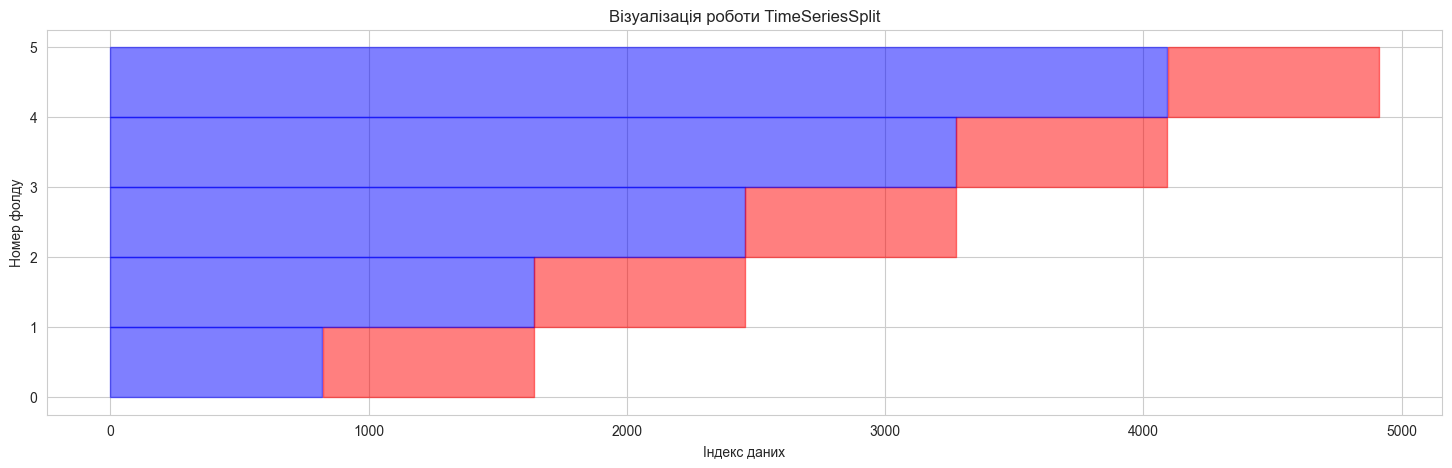

Починаємо крос-валідацію...

--- ФОЛД 1 ---
Розмір тренувального набору: 822, тестового: 818
MAE на фолді 1: 12.12

--- ФОЛД 2 ---
Розмір тренувального набору: 1640, тестового: 818
MAE на фолді 2: 10.86

--- ФОЛД 3 ---
Розмір тренувального набору: 2458, тестового: 818
MAE на фолді 3: 10.74

--- ФОЛД 4 ---
Розмір тренувального набору: 3276, тестового: 818
MAE на фолді 4: 10.66

--- ФОЛД 5 ---
Розмір тренувального набору: 4094, тестового: 818
MAE на фолді 5: 8.83

--- Результати крос-валідації ---
MAE по всіх фолдах: [12.12, 10.86, 10.74, 10.66, 8.83]
Середній MAE: 10.64
Стандартне відхилення MAE: 1.05


In [2]:
# Ініціалізуємо TimeSeriesSplit на 5 частин
tscv = TimeSeriesSplit(n_splits=5)

# Список для збереження результатів (помилок) на кожному фолді
mae_scores = []

# Візуалізуємо, як TimeSeriesSplit розділяє дані
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    # Заповнюємо тренувальний набір синім кольором, тестовий - червоним
    ax.fill_betweenx(y=[i, i+1], x1=train_index.min(), x2=train_index.max(), color='blue', alpha=0.5)
    ax.fill_betweenx(y=[i, i+1], x1=test_index.min(), x2=test_index.max(), color='red', alpha=0.5)
ax.set_title('Візуалізація роботи TimeSeriesSplit')
ax.set_xlabel('Індекс даних')
ax.set_ylabel('Номер фолду')
plt.show()

# Запускаємо цикл крос-валідації
print("Починаємо крос-валідацію...")
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\n--- ФОЛД {fold + 1} ---")

    # Створюємо тренувальний та тестовий набори для цього фолду
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"Розмір тренувального набору: {len(X_train)}, тестового: {len(X_test)}")

    # Ініціалізуємо та навчаємо модель
    model = xgb.XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Робимо прогноз та оцінюємо якість
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mae_scores.append(mae)
    print(f"MAE на фолді {fold + 1}: {mae:.2f}")

print("\n--- Результати крос-валідації ---")
print(f"MAE по всіх фолдах: {[round(score, 2) for score in mae_scores]}")
print(f"Середній MAE: {np.mean(mae_scores):.2f}")
print(f"Стандартне відхилення MAE: {np.std(mae_scores):.2f}")